## 재정 습관 분석을 통한 해지율
#### 처음 몇달간의 데이터 
* churn : 이탈여부, 1 = 이탈, 반응변수 = 종속변수
* housing : na = 거주상태 데이터 없음, R = 주택임대한 상태, o = 주택 소유한 상태
* credit_score : 신용점수
* deposits : 자기 계좌에 입금한 횟수
* withdrawal : 계좌에서 인출한 횟수
* purchases_partners : 제휴상점에서 구입한 횟수
* purchases : 제휴상점 외의 가게에서 구입한 횟수
* cc_taken : 유저가 가진 신용카드 수
* cc_recommended : 신용카드를 추천받은 횟수
* cc_disliked : 신용카드를 거부한 횟수
* cc_application_begin : 신용카드 신청을 시작한 횟수, 신청 과정 시작하기만 하면 추가됨
* web_user : 웹사이트사용한 경험
* registered_phones : 1개 이상의 폰을 등록했는지, 1개인 경우 0
* payment_type : 유저가 돈을 받는 빈도
* waiting_4_loan : 대출 대기 중, 대출 신청했고 승인을 기다리는 중인 상태
* cancelled_loan : 대출 취소여부
* received_loan : 대출 받았는지 여부
* rejected_loan : 대출 거부했는지 여부, 대출이 승인되었으나 유저가 거절한 경우
* zodiac_sign : 별자리
* left_for_two_month_plus : 2개월 이상 제품 사용을 중단했다 돌아온 경우
* left_for_one_month : 제품 사용 중단이 1개월인 경우 
* rewards_earned : 획득한 포인트
* reward_rate : 
* is_referred : 다른 사람에게 추천받은 적 있는지 여부


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('input/churn_data.csv')
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
df.columns.tolist()

['user',
 'churn',
 'age',
 'housing',
 'credit_score',
 'deposits',
 'withdrawal',
 'purchases_partners',
 'purchases',
 'cc_taken',
 'cc_recommended',
 'cc_disliked',
 'cc_liked',
 'cc_application_begin',
 'app_downloaded',
 'web_user',
 'app_web_user',
 'ios_user',
 'android_user',
 'registered_phones',
 'payment_type',
 'waiting_4_loan',
 'cancelled_loan',
 'received_loan',
 'rejected_loan',
 'zodiac_sign',
 'left_for_two_month_plus',
 'left_for_one_month',
 'rewards_earned',
 'reward_rate',
 'is_referred']

In [5]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
df.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [7]:
# removing NaN
# credit_score, rewards_earned는 null이 너무 많아 제외
df = df[pd.notnull(df['age'])]
df = df.drop(columns = ['credit_score', 'rewards_earned'])
df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

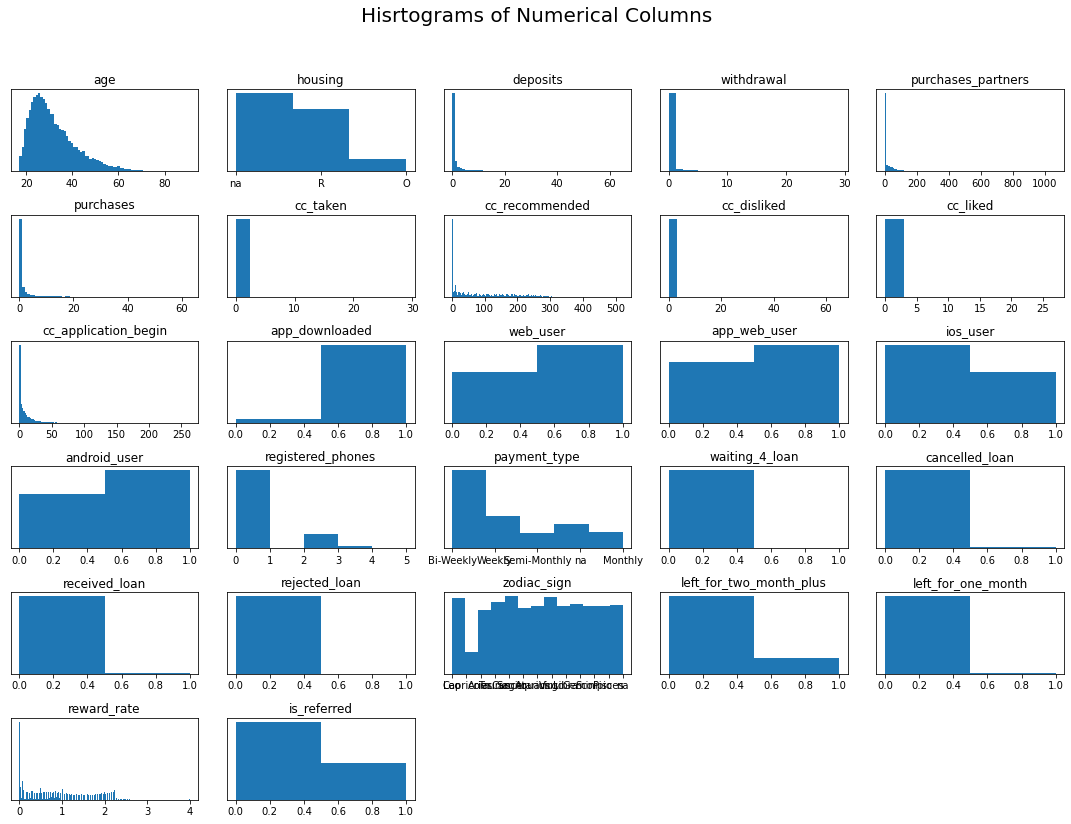

In [8]:
# histogram
df2 = df.drop(columns=['user', 'churn'])
plt.figure(figsize=(15,12))
plt.suptitle('Hisrtograms of Numerical Columns', fontsize = 20)
for i in range (1, df2.shape[1] + 1):
    plt.subplot(6, 5, i)
    # 수치를 도식화
    f = plt.gca()
    # y 라벨 제거
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    vals = np.size(df2.iloc[:, i - 1].unique())
    
    plt.hist(df2.iloc[:, i - 1], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    

age : 오른쪽 꼬리모양, 대다수의 노인들은 핀테크 서비스를 사용하지 않음  
housing : 불명을 제외한 대부분이 세입자  
disposits, withdrawal, purchases, purchases_partners : 대부분의 사람들이 입금한 적 없다, 처음 몇달간의 데이터로 활동량이 적을 수 있다  
app_downloaded : 대부분이 앱 다운받음  
resistered_phones : 대부분은 1대만 등록, 2대 등록은 소수  
payment_type : 격주가 압도적, 격주와 주간이 주요함  
zodiac_sign : 고르게 분포, 특정 달이나 기간과 관계없음, 염소자리가 적음  
<br>
#### 분포가 어떻게 되었으며 무엇을 기대할 수 있고 무엇이 수상한지 무엇을 추가로 탐구할지, 어떤 분야가 균등하고 균등하지 않은지를 봐야함
<br>

### 이진그래프가 많고 다른 분포들은 오른쪽  꼬리를 그리며 대부분 처음 나오는 요소에 집중되어있음

C:\Users\SEONGJ~1\AppData\Local\Temp/ipykernel_8040/2983413426.py:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels = index, autopct = '%1.1f%%')


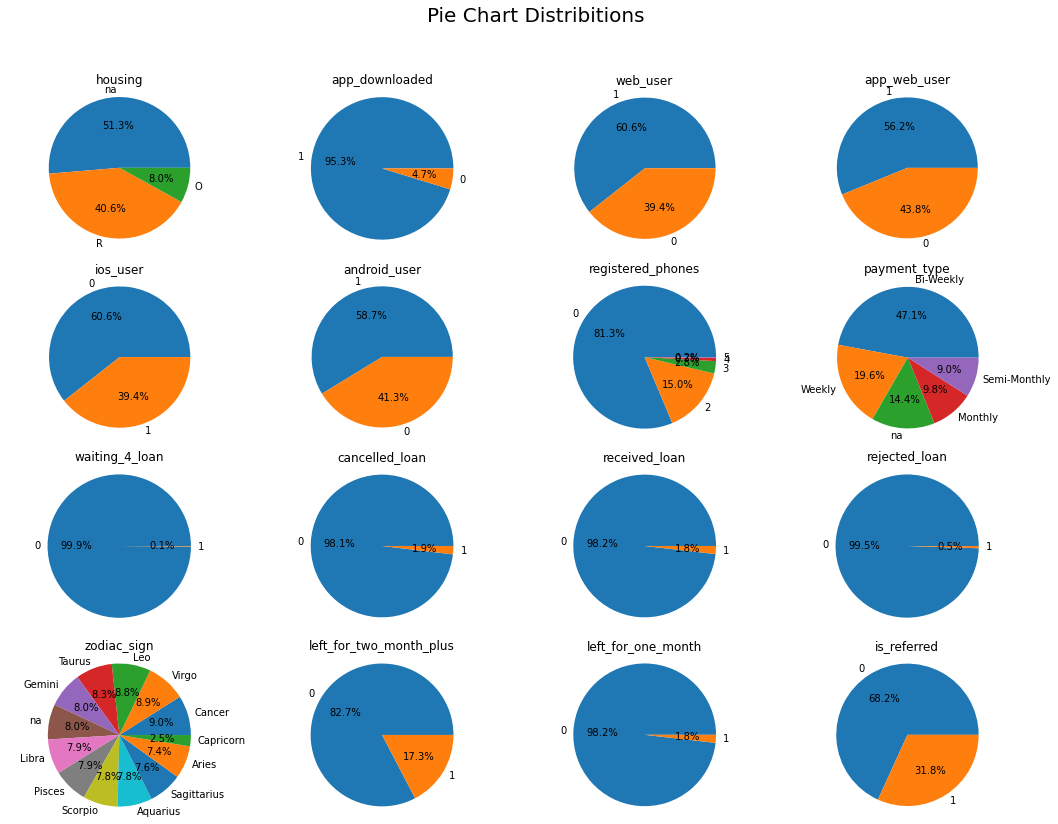

In [9]:
# pie plots
# 이진변수들을 파이그래프로 도식화
# 어떤 열이 극도로 치우친 분포를 보여 
# 반응변수의 가능한 값이 너무 작아지는 경우를 방지해야함
# 모델에서 이진 열의 중요도가 높아지면 다른 필드의 값에 무관하게 열의 값이 0이 되는 경우
# 예상값 역시 0이 도출될 수 밖에 없음

df2 = df[['housing', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'payment_type',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred'
        ]]

plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distribitions', fontsize = 20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(4,4,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(df2.columns.values[i - 1])
    
    # value_counts() : 전체 관찰 수 내에서 값이 발생하는 횟수의 비율로 반환
    values = df2.iloc[:,i-1].value_counts(normalize = True).values
    index = df2.iloc[:,i-1].value_counts(normalize = True).index
    # autopct = 분포값을 어떻게 표시할지
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

housing : 공개 미공개로 나눌 수 있음  
web_user, android_user, is_referred 등 : 고르게 분포  
waiting_4_loan, rejected_loan, left_for_one_month, cancelled_loan : 작은 수치의 하위 세트는 행의 해지 변수의 결과를 만들기에 부족함 -> 모델에 유용한지 확인해야함  

In [10]:
# Exploding Uneven Features
# 해지 변수를 포함해 값의 분포도를 살펴볼 수 있도록
df[df2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [11]:
df[df2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [12]:
df[df2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [13]:
df[df2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [14]:
df[df2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

반응변수 양쪽 모두가 작은 하위 집합으로 표시
분포가 균일한지 균일하지 않은지  
작은 하위 세트가 반응변수 값 모두를 포함하는지의 여부를 판단하기 위한 작업
대부분의 반응변수가 고르게 분포함

In [15]:
df.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation With the Response Variable'}>

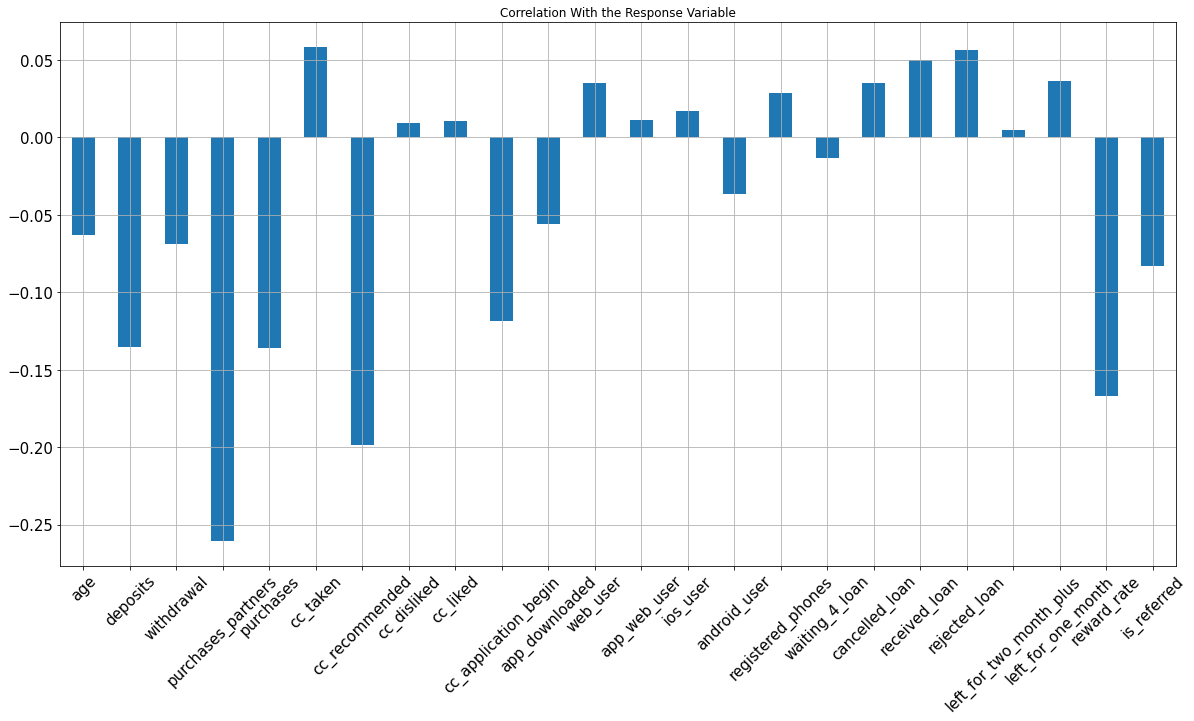

In [16]:
# Correlation with Response Variable

df.drop(columns = ['user', 'churn', 'housing', 'payment_type', 'zodiac_sign']).corrwith(df.churn).plot.bar(
    figsize=(20,10), title = "Correlation With the Response Variable", 
    fontsize = 15, rot = 45, grid = True)


age : 반응변수와 음의 상관관계, 어릴수록 해지율이 높아짐  
deposits, withdrawal, purchases_partners, purchases : 음의 상관관계  
cc_taken : 양의 상관관계로 신용카드 만든 사람들이 해지할 확률이 높다 -> 신용카드에 대한 만족도가 낮을 수 있음  
cc_recommended : 추천수가 적을수록 해지율이 높다, 추천을 많이 해야 해지하지않음  cc_disliked, cc_liked : 양의 상관관계이나 막대 크기가 작아 큰 의미없음  
cc_application_begin : 앱을 적게 사용할수록 해지할 가능성 높아짐  
app_downloaded : 앱 다운로드를 하면 해지할 확률 낮음  
web_user, app_web_user, ios_user : 해당 유저일 경우 해지할 가능성 높음
android_user : 안드로이드 유저일 경우 해지할 가능성 낮음  
registered_phones : 많은 폰을 등록할 경우 남을 확률 높음  
cancelled_loan, received_loan, rejected_loan, left_for_two_month_plus, left_for_one_month : 양의 상관관계로 행동을 취할수록 해지확률이 높다  
is_referred : 누군가에게 추천받은 경우 해지확룰이 낮다

C:\Users\SEONGJ~1\AppData\Local\Temp/ipykernel_8040/3374583077.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype = np.bool)


<AxesSubplot:>

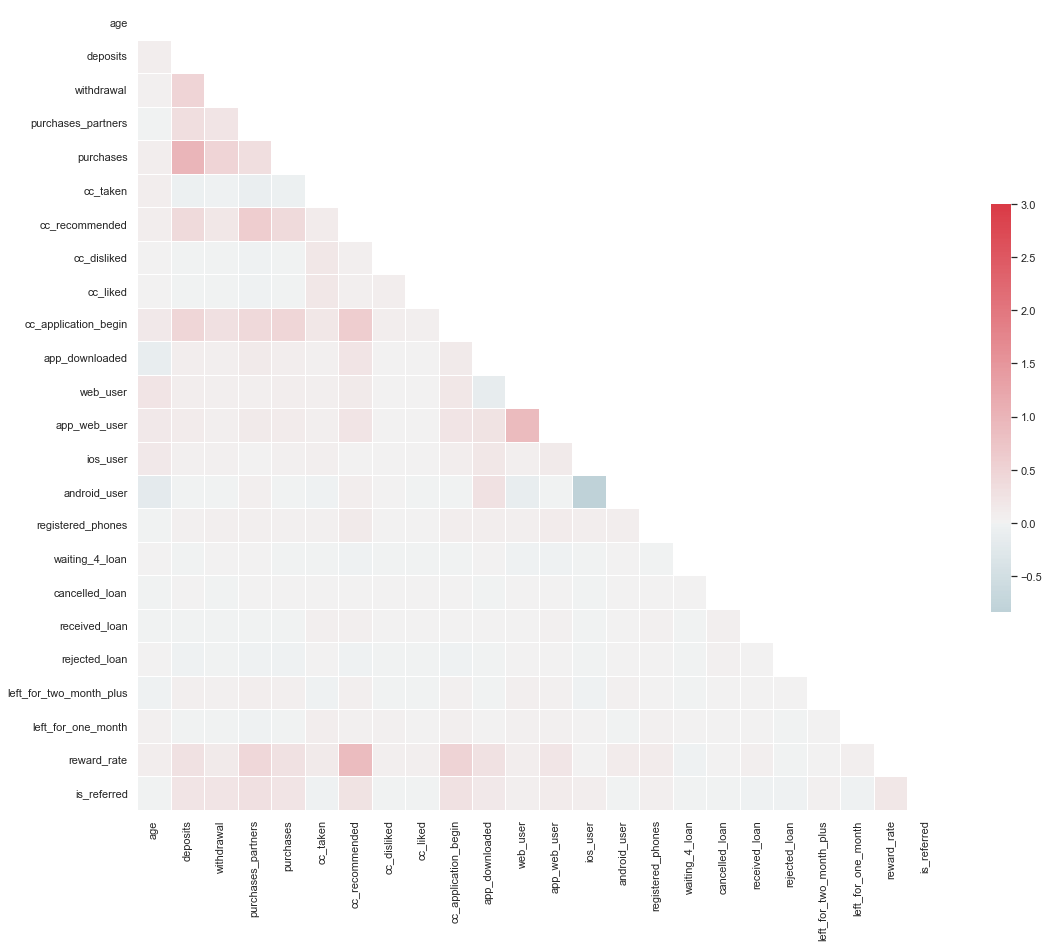

In [17]:
# Correlation Matrix
# 독립된 필드 간의 연관성을 보여주는 그래프

sns.set(style="white")
corr = df.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize = (18,15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink":.5})

android_user, ios_user는 음의 상관관계  
대부분 1대 등록인 상태에서 android유저는 ios유저가 아님  
정확한 상관관계는 아니나 연관성이 강해 둘 중 하나는 제거하는 게 나을 수 있음  
남성 유저와 여성 유저의 경우  
여성유저가 아니라면 대부분 남성 범주에 속함 -> 하나의 열만 있어도 됨, 새로운 것을 제공하지 않기에  

app_web_user는 web_user, app_downloaded가 1일때 무조건 1  
독립변수가 아니여서 사용하지 않을 것  
-> 상관행렬도 알아낸 사실이 아님  
상관행렬이 모든 연관성을 표시하지 못함  


In [18]:
# remove correlation fields
df = df.drop(columns=['app_web_user'])
df.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [19]:
# save csv file
df.to_csv('input/new_churn_data.csv', index = False)

In [20]:
dataset = pd.read_csv('input/new_churn_data.csv')

In [21]:
# data preparation
# 유저 열은 예측에 사용하지 않지만 마지막에 예측을 일치시킬때 사용

user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])
dataset.columns

Index(['churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'payment_type', 'waiting_4_loan', 'cancelled_loan', 'received_loan',
       'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred'],
      dtype='object')

In [22]:
# one hot encoding
# 범주 변수를 고유의 독립된 이진 열로 변환
# python모델이 범주변수를 그대로 읽지 못해 독립변수를 찾지 못함

dataset.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [23]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [24]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

housing_na는 housing_O, housing_R가 0 일때 항상 1  
-> 이 경우 상관관계가 만들어짐, 하나의 열을 대체하거나 재거해야함
housing_na의 경우 null값이라 비공개 정보라는 점을 보아 별로 중요하지 않음  
zodiac_sign_na, payment_type_na도 제거

In [25]:
# removing correlated fields
dataset = dataset.drop(columns=['housing_na', 'payment_type_na', 'zodiac_sign_na'])
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=["churn"]), dataset["churn"],
                                                                 test_size=0.2, random_state=42)

In [27]:
# balancing the training set

y_train.value_counts()
# 데이터가 편향됨 - 학습세트가 반응변수에 포함하는 0과 1의 수 균형을 잡아야함

0    12668
1     8928
Name: churn, dtype: int64

In [30]:
import random
# 반응변수의 양수와 음수의 값을 고유 인덱스로 분리
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

# 값의 일부를 무작위로 선택해 토막내어 higher, lower 같은 크기로 만듬
random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
# 같은 크기의 , higher와 lower를 조합
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [31]:
# feature scaling - 정규화
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
# 데이터프레임으로 만든 이유 : 스케일러가 다차원numpy 배열을 반환하기 때문
# 행 인덱스와 열 이름을 잃게 됨
# 스케일링된 데이터 프레임에는 열이름이 없어 원본의 열 이름을 바꾼 후 새로운 데이터 프레임으로 설정
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


## model building

In [32]:
# fitting model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [35]:
# evaluating results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.6169354838709677

Test Data Accuracy: 0.6130


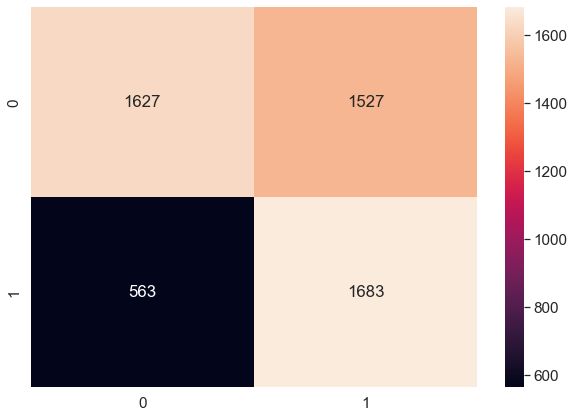

In [37]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred))


In [43]:
# applying k-fold validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv= 10)
print("Accuracy; %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Accuracy; 0.640 (+/- 0.022)


In [45]:
# analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]), 
         pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])], axis = 1)

,features,coef
0,age,-0.181028
1,deposits,0.161988
2,withdrawal,0.048793
3,purchases_partners,-0.706028
4,purchases,-0.284061
5,cc_taken,0.082219
6,cc_recommended,0.081520
7,cc_disliked,-0.015710
8,cc_liked,-0.009109
9,cc_application_begin,0.010636


## Feature Selection

In [51]:
from sklearn.feature_selection import RFE

classifier = LogisticRegression()
# 열의 개수를 40 -> 20
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

print(rfe.support_)
X_train.columns[rfe.support_]
print(rfe.ranking_)
# 2는 탑 20에 포함되지 않았으나 21번째로 중요했던 것

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True  True  True  True  True  True  True False False False False  True
 False  True  True False  True  True  True  True  True  True False  True
  True False False False  True False False False False False False False
 False False False  True False]
[ 1  1  1  1  1  1  1 14 18 17 20  1  3  1  1  4  1  1  1  1  1  1 15  1
  1  9 10 11  1  2  8 12  7 22 13 19  6 21  5  1 16]


In [52]:
# fitting model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)


LogisticRegression(random_state=0)

In [53]:
y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [54]:
# evaluating results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
f1_score(y_test, y_pred)

0.617948717948718

Test Data Accuracy: 0.6137


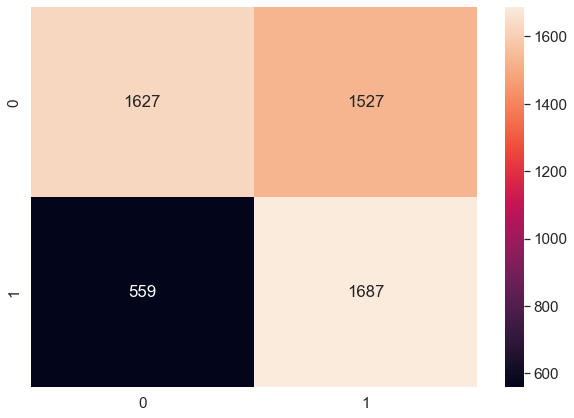

In [55]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(df_cm, annot = True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test,y_pred))

많은 필드가 해지와는 연관이 전혀 없어서 사실 쓸모가 없었음  


In [57]:
# analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]), 
         pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])], axis = 1)

,features,coef
0,age,-0.180158
1,deposits,0.159175
2,withdrawal,0.051976
3,purchases_partners,-0.697456
4,purchases,-0.278179
5,cc_taken,0.080569
6,cc_recommended,0.090764
7,web_user,0.120943
8,android_user,-0.095005
9,registered_phones,0.117848


계수가 크게 변하지 않았어도 전체 평균은 크게 올랐다  
계수가 낮은 20개 열, 중요도 매우 낮은 20개 열을 제거했기 때문

In [59]:
final_results = pd.concat([y_test, user_identifier], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results

,user,churn,predicted_churn
0,41406,0.0,0
1,30693,0.0,1
2,8381,0.0,0
3,46960,0.0,1
4,42910,0.0,1
...,...,...,...
5395,19540,0.0,1
5396,22377,0.0,0
5397,32870,0.0,1
5398,65830,1.0,1
